This BLASTNet Tutorial is written by Wai Tong Chung, and Bassem Akoush. More info visit https://blastnet.github.io

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

Input data files are available in the read-only "../input/" directory
For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Citations

Please cite the following when publishing based on this dataset:

1. Appl. Energy in Combust. Sci. Paper: https://doi.org/10.1016/j.jaecs.2022.100087
2. ICML W. Paper: https://openreview.net/forum?id=LxGTZM7L6qn
3. Dataset citation: https://doi.org/10.5281/zenodo.7242864


# Import libs and set data path

In [1]:
import numpy as np # linear algebra
import json
import os
import matplotlib.pyplot as plt

data_path = '/kaggle/input/'+os.popen('ls '+'/kaggle/input/').read().split('\n')[0]+'/'
print("Data path: ",data_path)

Data path:  /kaggle/input/passive-fhit-dns-r1/


# Metadata

We first obtain info on this BLASTNet dataset by reading info.json.

In [2]:
f = open(data_path + '/info.json')
metadata = json.load(f) #returns a dict

The metadata is comprised of the global metadata, which provides info on the dataset as a whole:

In [3]:
for key in metadata['global']:
    print(key," : ",metadata['global'][key])

dataset_id  :  bassemakoush/passive-fhit-dns-r1
Nxyz  :  [1024, 1024, 1024]
snapshots  :  7
variables  :  ['UX_ms-1', 'UY_ms-1', 'UZ_ms-1', 'Y']
compression  :  None
grid  :  {'x': './grid/X_m.dat', 'y': './grid/Y_m.dat', 'z': './grid/Z_m.dat'}
bc  :  Periodic in x-, y-, and z-directions.
ic  :  Forced HIT with Re_t = 121, integral lengthscale of velocity field of 0.8 and Kolmogorov lengthscale of 0.011m. U is statistically steady, large-scale spectral forcing is used. nu = 0.0055, k = 11.58, epsilon = 11.06.
doi  :  https://doi.org/10.1017/jfm.2022.367
contributors  :  Michael Gauding
description  :  Passive scalar transport in forced homogeneous isotropic turbulence DNS


And the local metadata which provides info on the individual snapshots. Here, we print some local metadata.

In [4]:
if len(metadata['local'])>3:
    for file_id in range(3):
        for key in metadata['local'][file_id]:
            print(key," : ",metadata['local'][file_id][key])
        print("----------------------------------")
else:
    file_id = 0
    for key in metadata['local'][file_id]:
        print(key," : ",metadata['local'][file_id][key])



id  :  0
UX_ms-1 filename  :  ./data/UX_ms-1_id000.dat
UY_ms-1 filename  :  ./data/UY_ms-1_id000.dat
UZ_ms-1 filename  :  ./data/UZ_ms-1_id000.dat
Y filename  :  ./data/Y_id000.dat
----------------------------------
id  :  1
UX_ms-1 filename  :  ./data/UX_ms-1_id001.dat
UY_ms-1 filename  :  ./data/UY_ms-1_id001.dat
UZ_ms-1 filename  :  ./data/UZ_ms-1_id001.dat
Y filename  :  ./data/Y_id001.dat
----------------------------------
id  :  2
UX_ms-1 filename  :  ./data/UX_ms-1_id002.dat
UY_ms-1 filename  :  ./data/UY_ms-1_id002.dat
UZ_ms-1 filename  :  ./data/UZ_ms-1_id002.dat
Y filename  :  ./data/Y_id002.dat
----------------------------------


# Grid Information

Since we're dealing with spatial data let's look at the spatial grid. We first get some details from the metadata.

In [5]:
Nx,Ny,Nz = metadata['global']['Nxyz']

X_filename = metadata['global']['grid']['x']
Y_filename = metadata['global']['grid']['y']
Z_filename = metadata['global']['grid']['z']

print(X_filename)
print(Y_filename)
print(Z_filename)

./grid/X_m.dat
./grid/Y_m.dat
./grid/Z_m.dat


Now lets load the 3D grid data and obtain their 1D profiles

In [6]:
#load data
X =  np.fromfile(data_path+X_filename,dtype='<f4').reshape(Nx,Ny,Nz)
Y =  np.fromfile(data_path+Y_filename,dtype='<f4').reshape(Nx,Ny,Nz)
Z =  np.fromfile(data_path+Z_filename,dtype='<f4').reshape(Nx,Ny,Nz)
#get 1d profile
x1d = np.unique(X)
y1d = np.unique(Y)
z1d = np.unique(Z)

We can use this to plot the dimensions of the grid in 1D.

Text(0.5, 0, 'Index k')

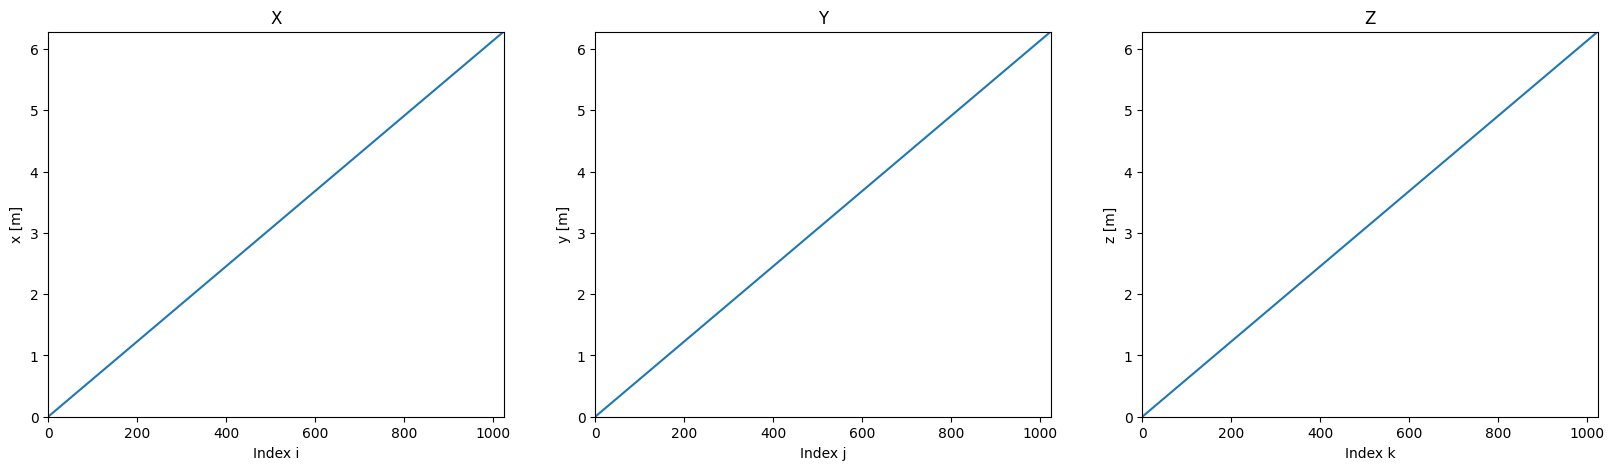

In [7]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))
axs[0].plot(x1d)
axs[0].set_xlim([0,len(x1d)])
axs[0].set_ylim([x1d.min(),x1d.max()])
axs[0].set_title('X')
axs[0].set_ylabel('x [m]')
axs[0].set_xlabel('Index i')


axs[1].plot(y1d)
axs[1].set_xlim([0,len(y1d)])
axs[1].set_ylim([y1d.min(),y1d.max()])
axs[1].set_title('Y')
axs[1].set_ylabel('y [m]')
axs[1].set_xlabel('Index j')

axs[2].plot(z1d)
axs[2].set_xlim([0,len(z1d)])
axs[2].set_ylim([z1d.min(),z1d.max()])
axs[2].set_title('Z')
axs[2].set_ylabel('z [m]')
axs[2].set_xlabel('Index k')


# Visualizing a single flowfield

We now visualizing the a random velocity flowfields using imshow. Here load the file with metadata info with a random number generator.

In [8]:
#Random number generator
nfile = len(metadata['local'])
file_id = np.random.randint(nfile)

#Load and reshape array
u_filename = metadata['local'][file_id]['UX_ms-1 filename']
u = np.fromfile(data_path+u_filename,dtype='<f4')
u = u.reshape(Nx,Ny,Nz)

print("Array shape: ")
print(u.shape)

Array shape: 
(1024, 1024, 1024)


Next we plot files in the x-,y-, and z- planes. Note that the arrays are in ijk order.

File Id = 1


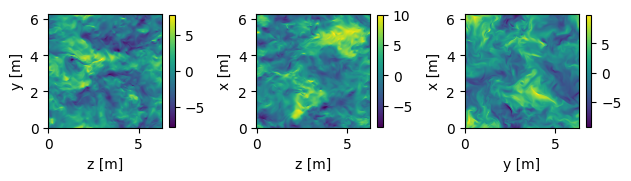

In [9]:
align='horizontal'
# figsize = np.array((10, 5))
if align == 'vertical':
    fig, axs = plt.subplots(3,1,figsize=figsize.T)
    for ax in axs.flat:
        ax.set_aspect('equal')

    imX = axs[0].pcolormesh(Y[int(len(x1d)/2),:,:], Z[int(len(x1d)/2),:,:],u[int(len(x1d)/2),:,:])
    axs[0].set_xlabel('y [m]')
    axs[0].set_ylabel('z [m]')

    imY = axs[1].pcolormesh(X[:,int(len(y1d)/2),:], Z[:,int(len(y1d)/2),:],u[:,int(len(y1d)/2),:])
    axs[1].set_xlabel('x [m]')
    axs[1].set_ylabel('z [m]')

    imZ = axs[2].pcolormesh(X[:,:,int(len(z1d)/2)], Y[:,:,int(len(z1d)/2)], u[:,:,int(len(z1d)/2)])
    axs[2].set_xlabel('x [m]')
    axs[2].set_ylabel('y [m]')
else:
    fig, axs = plt.subplots(1,3)
    for ax in axs.flat:
        ax.set_aspect('equal')
    imX = axs[0].pcolormesh(Z[int(len(x1d)/2),:,:], Y[int(len(x1d)/2),:,:], u[int(len(x1d)/2),:,:])
    axs[0].set_ylabel('y [m]')
    axs[0].set_xlabel('z [m]')

    imY = axs[1].pcolormesh(Z[:,int(len(y1d)/2),:], X[:,int(len(y1d)/2),:], u[:,int(len(y1d)/2),:])
    axs[1].set_ylabel('x [m]')
    axs[1].set_xlabel('z [m]')

    imZ = axs[2].pcolormesh(Y[:,:,int(len(z1d)/2)], X[:,:,int(len(z1d)/2)], u[:,:,int(len(z1d)/2)])
    axs[2].set_ylabel('x [m]')
    axs[2].set_xlabel('y [m]')

fig.colorbar(imX, ax=axs[0], shrink=0.25)
fig.colorbar(imY, ax=axs[1], shrink=0.25)
fig.colorbar(imZ, ax=axs[2], shrink=0.25)
plt.tight_layout()

print('File Id = '+str(metadata['local'][file_id]['id']))
# print('t = '+str(metadata['local'][file_id]['time [s]'])+' s')

# Browse the dataset 

Now that we've visualized and loaded the data, we can now browse for more info on the data.

We start by printing the max and min of the flowfields we have:

In [10]:
from prettytable import PrettyTable
#Random number generator
file_id = np.random.randint(nfile)
local_meta = metadata['local'][file_id]

#Print min max
tab = PrettyTable(['Var.','Min', 'Max'])
for key in local_meta:
    if 'filename' in key:
        field = np.fromfile(data_path+local_meta[key],dtype='<f4').reshape(Nx,Ny,Nz)
        tab.add_row([key.replace(' filename',''),field.min(), field.max() ])
print(tab)



+---------+------------+-----------+
|   Var.  |    Min     |    Max    |
+---------+------------+-----------+
| UX_ms-1 | -12.48325  | 11.676299 |
| UY_ms-1 | -15.581555 | 12.483515 |
| UZ_ms-1 | -13.645053 | 10.308615 |
|    Y    | -4.6870537 | 5.8098364 |
+---------+------------+-----------+


Now let's visualize what the flowfields look like from start and finish:

Plotting 4 variables in 2 rows
File Id = 1


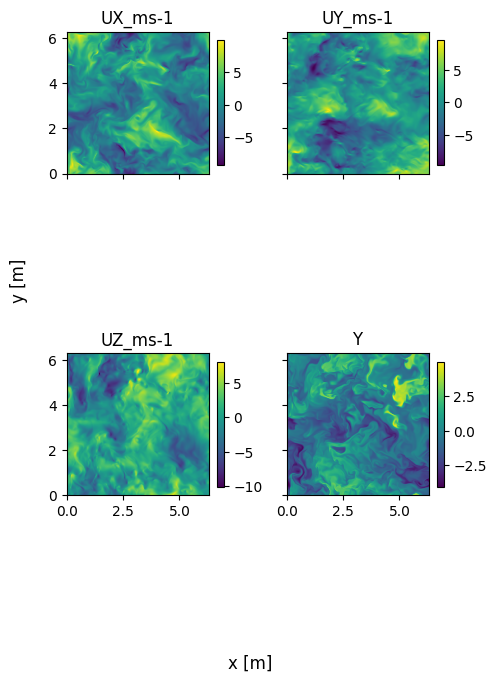

In [12]:
import math
#Input params
file_id = 1 
nrows = 2
figsize = (5, 8)
#Get Number of variables
nvar = len(metadata['global']['variables'])
print("Plotting "+str(nvar)+" variables in " + str(nrows) + " rows")

#Print file info:
local_meta = metadata['local'][file_id]
print('File Id = '+str(metadata['local'][file_id]['id']))
# print('t='+str(metadata['local'][file_id]['time [s]'])+' s')


#Plot all scalars
nplots = [nrows,int(nvar/nrows)]    
fig, axs = plt.subplots(nplots[0],nplots[1],figsize=figsize,sharex=True,sharey=True)
for ax in axs.flat:
    ax.set_aspect('equal')

count= 0
for key in local_meta:
    if 'filename' in key:
        field = np.fromfile(data_path+local_meta[key],dtype='<f4').reshape(Nx,Ny,Nz)
        if nplots[0]>1:
            i = int(count/nplots[1])
            j = count - i*nplots[1]
            im = axs[i,j].pcolormesh(Y[:,:,int(len(z1d)/2)], X[:,:,int(len(z1d)/2)],
                         field[:,:,int(len(z1d)/2)])

            fig.colorbar(im, ax=axs[i, j], shrink=0.3)
            axs[i,j].set_title(key.replace(' filename',''))
        else:
            im = axs[count].pcolormesh(Y[:,:,int(len(z1d)/2)], X[:,:,int(len(z1d)/2)],
                                     field[:,:,int(len(z1d)/2)])
            fig.colorbar(im, ax=axs[count],shrink=0.3)
            axs[count].set_title(key.replace(' filename',''))
        count=count+1
# _ = fig.text(0.04, 0.5, 'x [mm]', va='center', rotation='vertical')
# _ = fig.text(0.5, 0.04, 'y [mm]', ha='center')
fig.supxlabel("x [m]")
fig.supylabel("y [m]")
plt.tight_layout()
